Using this tutorial: https://huggingface.co/blog/clipseg-zero-shot

In [1]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

c:\Users\duker\anaconda3\envs\plant_id\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\duker\.cache\huggingface\hub\models--CIDAS--clipseg-rd64-refined. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/603M [00:00<?, ?B/s]

Unused or unrecognized kwargs: padding.


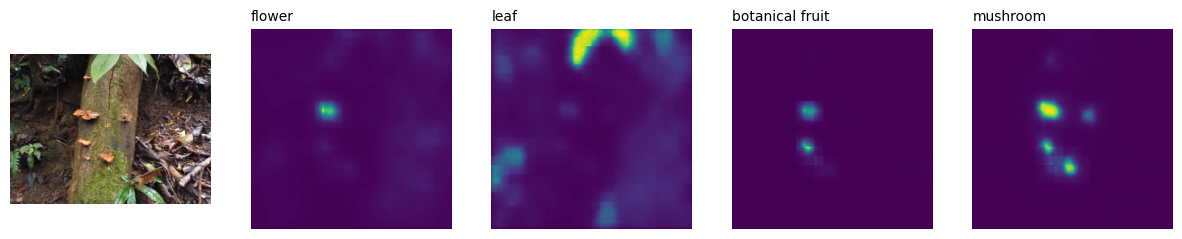

In [20]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
import os

directory_path = R"G:\.shortcut-targets-by-id\1BCCfXZq98f4rFOF8m0AweybL4qQakAUB\Summer Dive 2022\Monteverde Imagery - Stephanie\River\Dry Flight\100MEDIA"
image_basename = "P1480443.JPG"  # two red fruits
# image_basename = "P2120507.JPG"  # big bush with fruits
# image_basename = "P0960390.JPG"  # ferns, no flowers
# image_basename = "P1090403.JPG"  # palm tree with cool fruits, no flowers
image_basename = "P1580453.JPG"  # log with fungus
# image_basename = "P2330528.JPG"  # flowers on bush, and sky

image_path = os.path.join(directory_path, image_basename)

with Image.open(image_path) as image:
    prompts = ["flower", "leaf", "botanical fruit", "mushroom"]
    # fungus isn't the most robust prompt (thinks non fungus is fungus often) - mushroom is better

    inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")
    
    # predict
    with torch.no_grad():
        outputs = model(**inputs)
        preds = outputs.logits.unsqueeze(1)
    
    _, ax = plt.subplots(1, len(prompts) + 1, figsize=(3*(len(prompts) + 1), 4))
    [a.axis('off') for a in ax.flatten()]
    ax[0].imshow(image)
    [ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))]
    [ax[i+1].text(0, -15, prompt) for i, prompt in enumerate(prompts)]